In [2]:
# Directories
import os
os.chdir(r"E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis")
print(os.getcwd())


E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis


In [3]:
#Array packages
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import xarray as xr


#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping
import matplotlib.ticker as ticker
import cartopy.feature as cfeature
from matplotlib.patches import Circle
import matplotlib.patches as mpatches

# Directories
import os
import glob



C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


 # STUDY AREA

In [4]:
south_asia=gpd.read_file('DATA_r/shapefiles_new/Transboundary_merged/south_asia.shp')
south_asia=south_asia.loc[:,['Name','SUB_AREA','UP_AREA','geometry']]
south_asia.rename(columns={'Name': 'Basin'}, inplace=True)

Basin=['WFKS', 'Brahmani', 'Brahmaputra','Cauvery','EFMP', 'EFPK','Ganga', 'Godavari',
        'Indus', 'Krishna','Mahanadi', 'Mahi','Narmada', 'Pennar', 'Subarnarekha', 'Tapi', 'West Flowing','Sabarmati']


south_asia.Basin=Basin
south_asia=south_asia.iloc[[8,6,0,17,11,15,12,2,14,1,10,7,9,13,3,5,4,16],:].reset_index(drop=True)

south_asia.to_file('DATA_p/shapefile/south_asia_p.shp')

In [5]:
basin_map = gpd.read_file('DATA_r/shapefiles_new/IndiShape/IndShape.shp')
riv_map = gpd.read_file('DATA_r/shapefiles_new/India_streams/India_stream.shp')
ind_map=gpd.read_file('DATA_r/shapefiles_new/india_admin/Country/India_country.shp')


C:\Users\sstar\AppData\Local\Temp\ipykernel_23940\2246243769.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


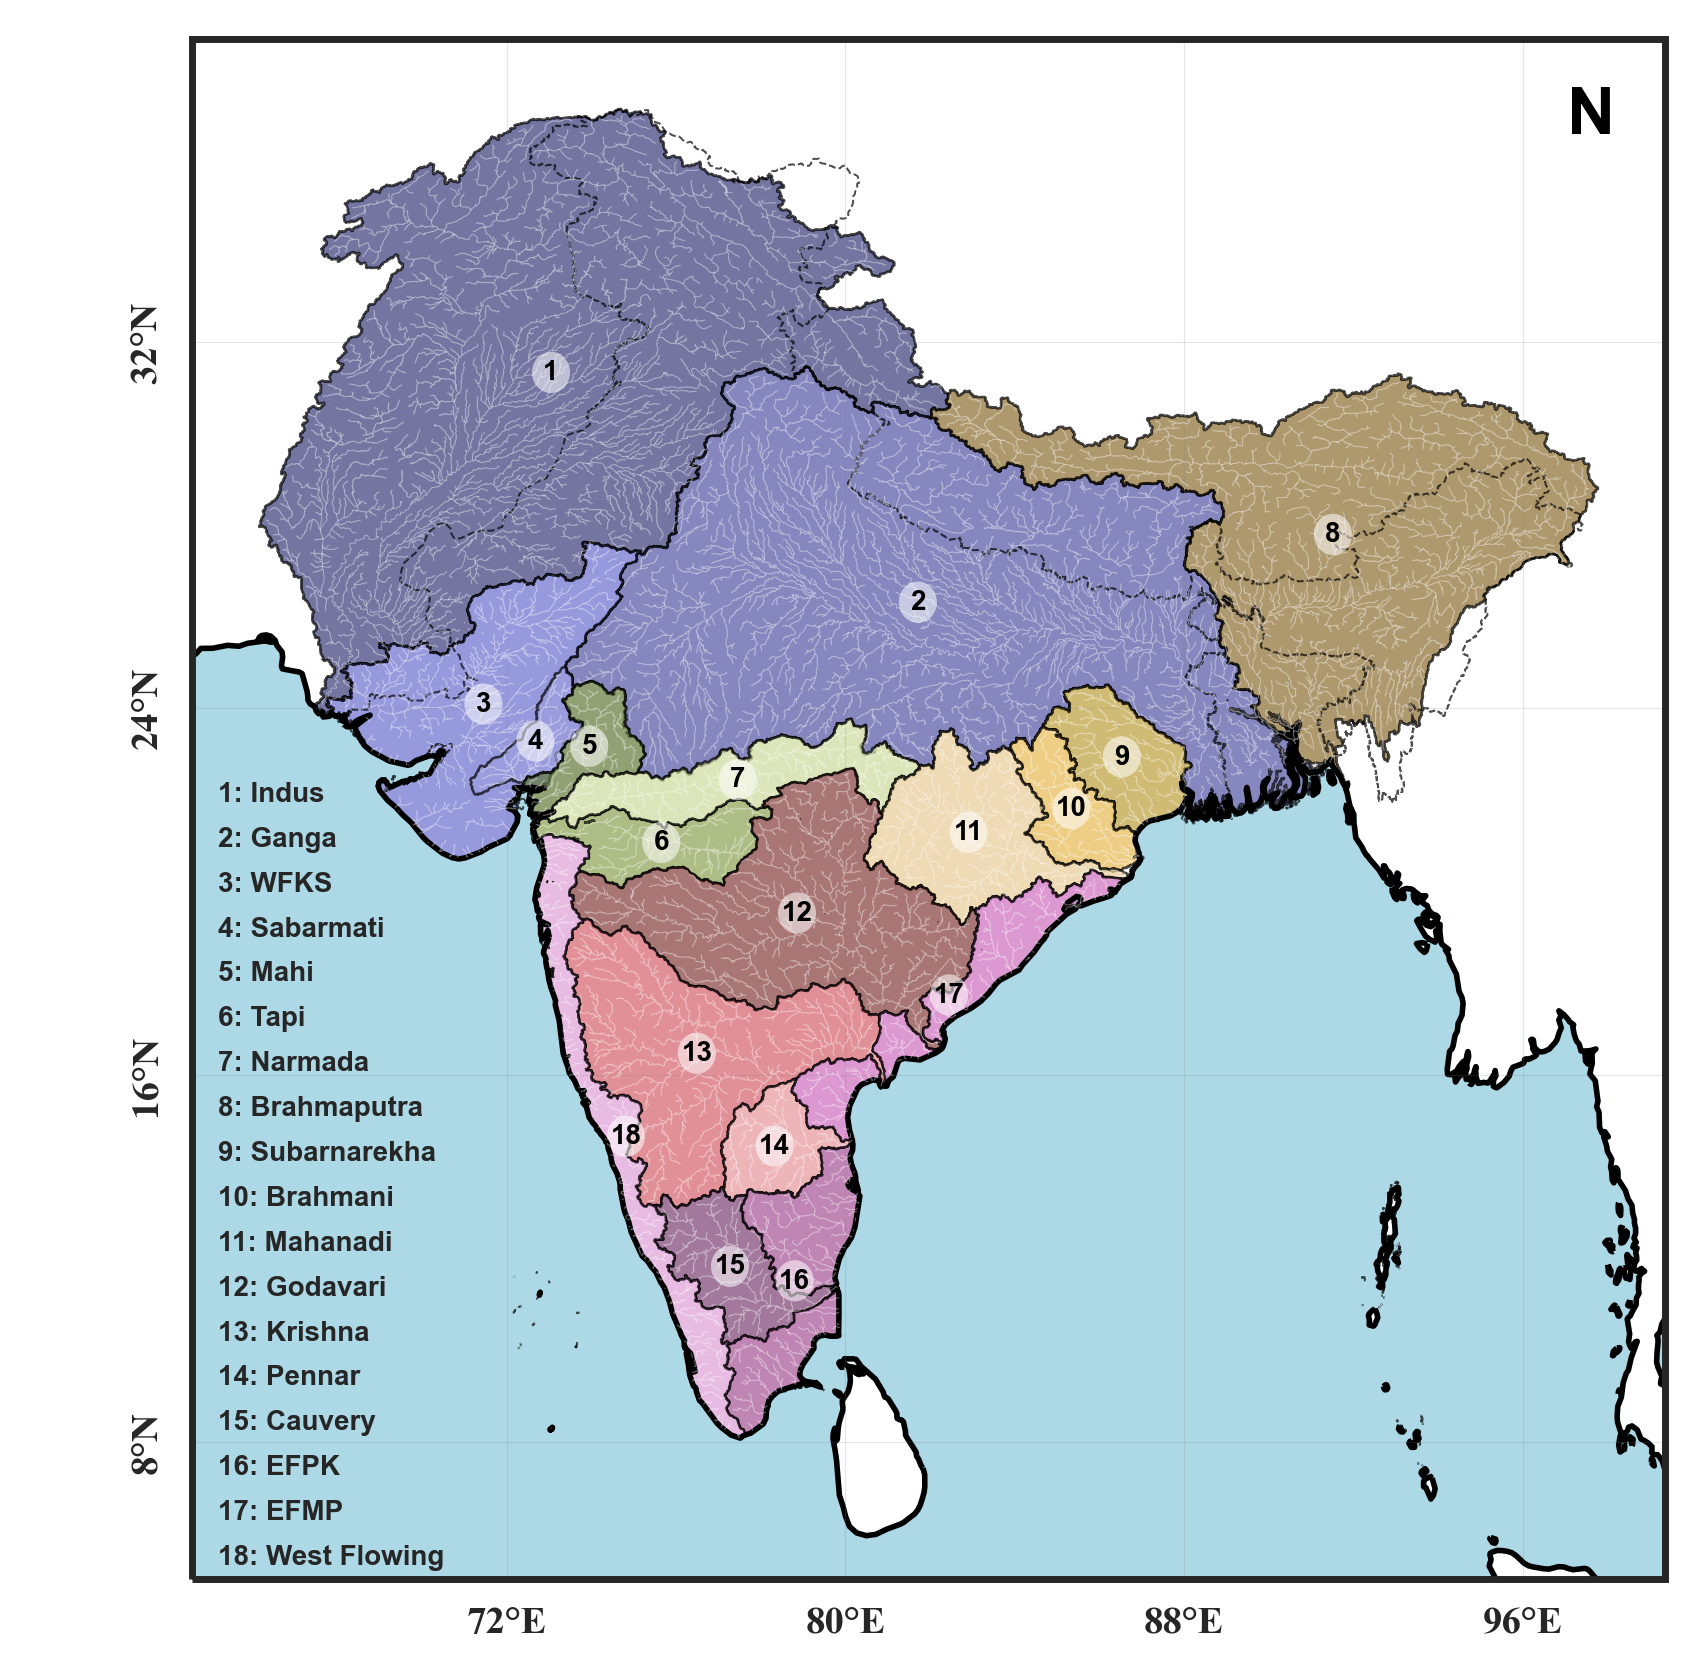

In [6]:
import scienceplots
from matplotlib.lines import Line2D
#plt.style.use(['science','no-latex','bright'])
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('seaborn-white')

num_colors = 50;marker_size = 6;marker_size2 = 5;alp = 0.1;alph = 0.05
basinEdge = 'black';basinEdge1 = 'blue';basinLine = 0.35

fig, ax = plt.subplots(1, 1, figsize=(5,5), subplot_kw={"projection": ccrs.PlateCarree()},
                         dpi=400, facecolor='white',constrained_layout=False)

ax.set_extent([64.571, 99.360,5, 38.599], ccrs.PlateCarree())
#basin_map.plot(ax=ax,color = 'none',edgecolor = basinEdge,linewidth=basinLine)
#ax.get_extent(ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.2, color='grey', alpha=0.2, linestyle='-')

gl.xlabel_style = {"size" : 7,'family': 'Times New Roman','rotation': 0}
gl.ylabel_style = {"size" : 7,'family': 'Times New Roman','rotation': 90}
gl.top_labels = False
gl.right_labels = False
gl.xlocator = plt.MaxNLocator(5)  # Adjust the number of x-axis gridlines as needed
gl.ylocator = plt.MaxNLocator(5)

south_asia = south_asia.to_crs(ccrs.PlateCarree().proj4_init)

#basin_map.plot(ax=ax,cmap='viridis',edgecolor = basinEdge,linewidth=basinLine)
south_asia.plot(ax=ax,cmap='tab20b',edgecolor = basinEdge,linewidth=basinLine*1.2,alpha=0.7)
ind_map.plot(ax=ax,color = 'none',linestyle='--',alpha=0.7,linewidth=basinLine)
riv_map.plot(ax=ax,color = 'white',alpha=0.4,linewidth=basinLine*0.5)
ax.add_feature(cfeature.COASTLINE, edgecolor='black',facecolor='blue')
ax.add_feature(cfeature.OCEAN,color='lightblue')

#ax.arrow(0.9, 0.95,0, 0.01, transform=ax.transAxes, color='black', width=0.001, head_width=0.03, head_length=0.01)
ax.text(0.95, 0.95, 'N', fontsize=12, fontweight='bold', transform=ax.transAxes, ha='center', va='center', color='black')

# Add number and circle around number
for i, row in south_asia.iterrows():
    basin_number = i + 1  # Assuming basins are indexed starting from 0
    basin_name = row['Basin']  # Assuming the name of the basin is stored in a column called 'Basin'
    basin_centroid = row.geometry.centroid  # Get the centroid of the basin
    ax.annotate(text=str(basin_number), xy=(basin_centroid.x, basin_centroid.y), xytext=(0, 0),ha='center', va='center', textcoords="offset points", color='black', fontsize=5, zorder=2)
    circle = Circle((basin_centroid.x, basin_centroid.y), radius=0.45, edgecolor='None', facecolor='white',alpha=0.55,transform=ccrs.PlateCarree())
    ax.add_patch(circle)


############ Creating legend
legend_handles = []
legend_labels = []

# Iterate through the GeoDataFrame to collect basin names and numbers

for i, row in south_asia.iterrows():
    basin_number = i + 1;basin_name = row['Basin']
    legend_labels.append(f"{basin_number}: {basin_name}")

for i in range(len(south_asia)):
    legend_handles.append(Line2D([0], [0]))
    # Set transparency for legend handles
for handle in legend_handles:
    handle.set_alpha(0)

# Create legend
legend = ax.legend(legend_handles,legend_labels, bbox_to_anchor=(0.205, 0.563),labelspacing=0.000001, title='',title_fontsize=6)
legend.get_title().set_ha('center') 

# Adjust legend font size
for text in legend.get_texts():
    text.set_fontsize(5)
    text.set_fontweight('bold')

plt.savefig("StudyArea.jpeg",dpi=1000)



# MAP unioning gand cleaning

In [22]:
gdf = gpd.read_file('DATA_p/Shapefiles/India_trans/India_trans_new.shp')

#merging east flowing
B1_merge = ['East_Flowing_M_G', 'East_Flowing_G_K', 'East_Flowing_K_P']
bas1 = gdf[gdf['Basin'].isin(B1_merge)]
m_geometry = bas1.geometry.unary_union;m_area = bas1.area.sum()
M1 = gpd.GeoDataFrame({'Basin': ['EFMP'], 'SUB_AREA': [m_area],'UP_AREA': [m_area], 'geometry': [m_geometry]}, crs=gdf.crs)

#merging east flowing
B2_merge = ['East_Flowing_Cauvery', 'East_flowing_pennar']
bas2 = gdf[gdf['Basin'].isin(B2_merge)]
m_geometry = bas2.geometry.unary_union;m_area = bas2.area.sum()
M2 = gpd.GeoDataFrame({'Basin': ['EFPK'], 'SUB_AREA': [m_area],'UP_AREA': [m_area], 'geometry': [m_geometry]}, crs=gdf.crs)

## APPENDING THEM
gdf_new = pd.concat([gdf, M1,M2], ignore_index=True)

## Dropingg the basins
B_drop=B1_merge+B2_merge+['east_flowing_mahdi_pnr','east_flowing_pnr_kanri','Brahmaputra','Ganga','Indus']
gdf_new=gdf_new[~gdf_new.Basin.isin(B_drop)]

gdf_new = gdf_new.reset_index(drop=True)
gdf_new.Basin[0:3]=['Brahmaputra','Ganga','Indus']
gdf_new.Basin[13]='West flowing'
gdf_new.Basin[14]='WFKS'

C:\Users\sstar\AppData\Local\Temp\ipykernel_4612\4249645626.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  gdf_new.Basin[0:3]=['Brahmaputra','Ganga','Indus']
C:\Users\sstar\AppData\Local\Temp\ipykernel_4612\4249645626.py:23: SettingWit

# 1. GRIDWISE